In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import joblib
import random


In [3]:
# Iris
# iris Features: [Sepal Length, Sepal Width, Petal Length, Petal Width]
# iris target: {Setosa, Versicolour, Virginica}
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
print(iris.target_names)


['setosa' 'versicolor' 'virginica']


[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 106, 113, 114, 119, 121, 123, 126, 127, 133, 138, 142, 146, 149], [50, 52, 77, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132, 134, 135, 136, 137, 139, 140, 141, 143, 144, 145, 147, 148]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2

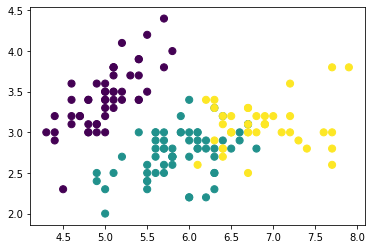

In [19]:
import math

class KMeans:
    def __init__(self, n_clusters=1, random_state=-1):
        self.n_clusters = n_clusters
        self.random_state = random_state
    
    def euclideanDist(self, x1, x2):
        total = 0
        for a, b in zip(x1, x2):
            total += (a-b) ** 2
        return math.sqrt(total)

    def computeClusterMean(self, cluster_points):
        return np.average(cluster_points, axis=0)

    def assignCluster(self, dataset, centroids):
        dataset_len = np.size(dataset, axis=0)
        centroids_len = np.size(centroids, axis=0)
        clusters = [[] for i in range(self.n_clusters)]
        
        for dIdx in range(dataset_len):
            centMinIdx = -1
            centDistMin = math.inf
            for centIdx in range(centroids_len):
                dist = self.euclideanDist(dataset[dIdx], centroids[centIdx])
                if dist < centDistMin:
                    centMinIdx = centIdx
                    centDistMin = dist
            clusters[centMinIdx].append(dIdx)
    
        return clusters
    
    def fit(self, X):
        if self.random_state != -1:
            np.random.seed(self.random_state)
        
        self._X = X

        # Get initial centroids
        centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

        X_len = np.size(X, axis=0)
        centroids_len = np.size(centroids, axis=0)

        # initial clusters
        clusters = self.assignCluster(X, centroids)

        done = False
        while (not done):
            # compute new centroids
            oldCentroids = np.ndarray.copy(centroids)
            for centIdx in range(centroids_len):
                centroids[centIdx] = self.computeClusterMean(X[clusters[centIdx]])
            
            if np.array_equal(centroids, oldCentroids):
                done = True
            else:
                clusters = self.assignCluster(X, centroids)
        
        self.centroids = centroids
        self.clusters = clusters

        return self
    
    def getClusters(self):
        return self.clusters
    
    def getIndexLabel(self, idx):
        for cIter in range(len(self.clusters)):
            if idx in self.clusters[cIter]:
                return cIter
        return -1

    def getLabels(self):
        X_len = np.size(self._X, axis=0)
        labels = []

        getIndexLabel = lambda i : self.clusters

        for i in range(X_len):
            labels.append(self.getIndexLabel(i))
        self.labels = labels
        return labels
    def visualize(self):
        plt.scatter(self._X[:, 0], self._X[:, 1], c= self.labels, s=50, cmap='viridis')

        centers = self.centroids
        plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


kmeans = KMeans(3, random_state=1)
clusterer = kmeans.fit(iris_X)

print(clusterer.getClusters())
print(clusterer.getLabels())
clusterer.visualize()
    

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [13]:
from sklearn import metrics
from math import factorial
#Fowkles-Mallows
clusters = clusterer.getClusters()
labels = clusterer.getLabels()
def nCr(n, r): 
    return(factorial(n) / (factorial(r)* factorial(n - r))) 

def FMI(labels_true, clusters):
    N = len(labels_true)
    total_pairs = (N*(N-1))/2
    #count positives
    count_positives_comb = 0
    for i in clusters:
        count_positives_comb += (nCr(len(i),2)) 
    #count TP
    count_attributes_in_class = []
    k = 0
    for i in clusters: #each clusters
        count_attributes_in_class.append([])
        #foreach labels, check is it the same class or not
        for l in set(labels_true):
            count_same_class = 0
            for attributes in i:
                if(labels_true[attributes]==l):
                    count_same_class += 1
            count_attributes_in_class[k].append(count_same_class)
        k+=1
    count_TP = 0
    for i in count_attributes_in_class:
        for j in i:
            if(j>1):
                count_TP += (nCr(j,2)) 
    #count FP
    count_FP = count_positives_comb - count_TP

    #count negatives
    count_negatives_comb = total_pairs - count_positives_comb

    #count FN
    count_FN = 0
    for clusters in count_attributes_in_class:
        for j in range (0,len(clusters)-1):    
            miss_attributes = 0
            for k in range(j+1,len(clusters)):
                miss_attributes += clusters[k]
            count_FN += clusters[j] * miss_attributes
    return count_TP**2 / ((count_TP + count_FP)*(count_TP + count_FN))

print(FMI(iris.target,clusters))
print(metrics.fowlkes_mallows_score(iris.target, labels))



0.637137034047264
0.8112427991975698


In [ ]:
# Silhouette Coefficient

metrics.silhouette_score(iris_X, labels, metric='euclidean')

